# Tangent fermions: time evolution

In this notebook we show how to use the code in tangent_fermions.py to evolve wave packets as explained in arXiv:2302.12793

In [1]:
import tangent_fermions as tf
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla

First, let us evolve a gaussian wave packet moving towards a Kein step with some angle in absence of magnetic field. We can use the split operator approach according to equation 5.5 in arXiv:2302.12793 :

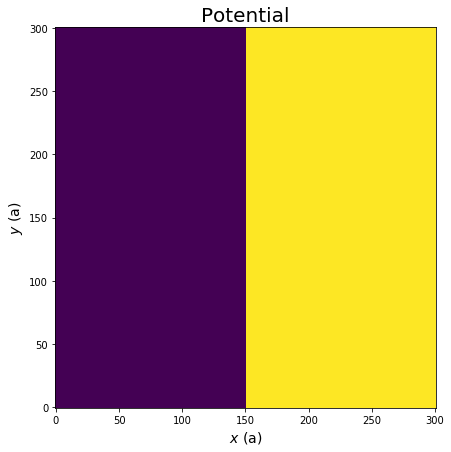

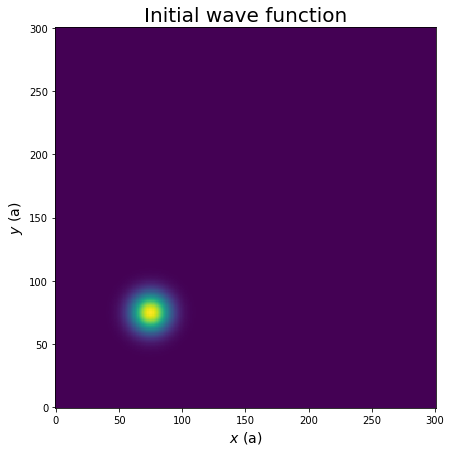

In [2]:
parameters = dict(
    Nx = 301,
    Ny = 301,
    dt = 1/np.sqrt(2),
    Nt = 300,
    potential = lambda x,y: np.rint(x//151), # Klein step
    mass = lambda x,y: 0*x,
    k = 0.5,
    phase = pi/4,
    sigma = 15,
    centre = (75,75),
    disorder = 0
)

wavefunction = tf.tangent_fermions_evolution_reciprocal(parameters, plot_potential = True, plot_init_state = True)

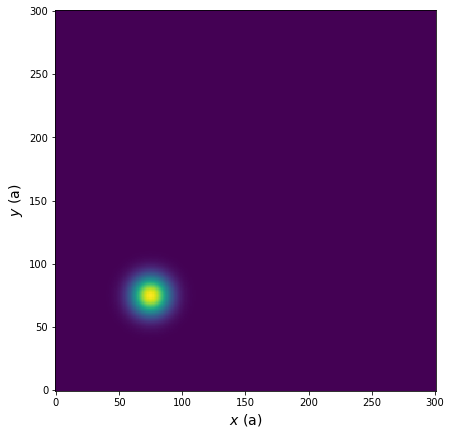

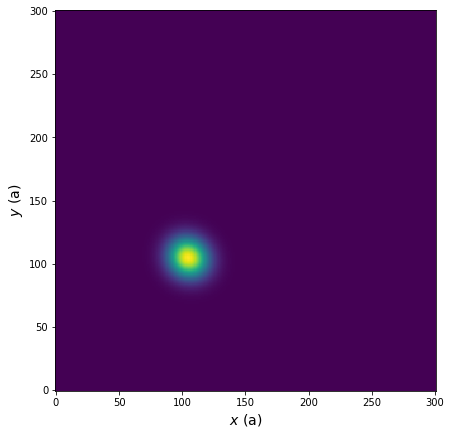

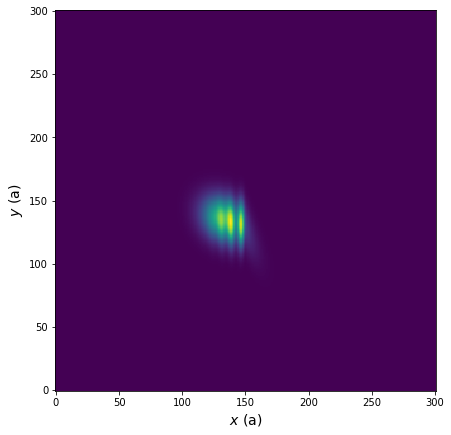

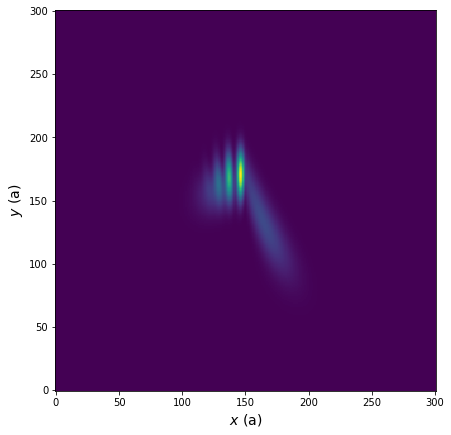

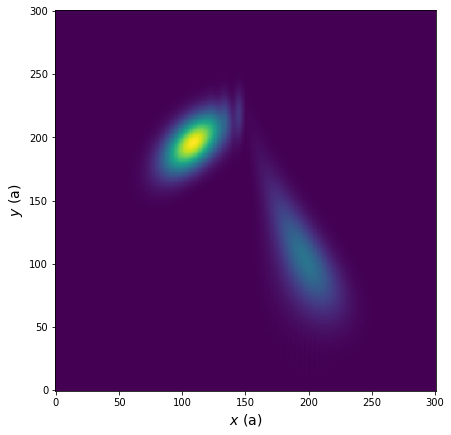

In [3]:
for t in range(5):
    probability = np.sum(np.abs(wavefunction[60*t])**2,axis = 0)
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    ax.imshow(probability, origin = 'lower')
    ax.set_xlabel(r'$x$ (a)', fontsize = 14)
    ax.set_ylabel(r'$y$ (a)', fontsize = 14)

We can also use the sparse LU approach (equation 7.4):

/marisdata/easybuild/software/QuantumMiniconda3/4.7.10/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


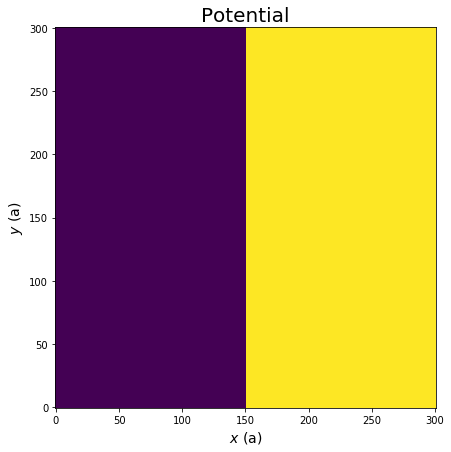

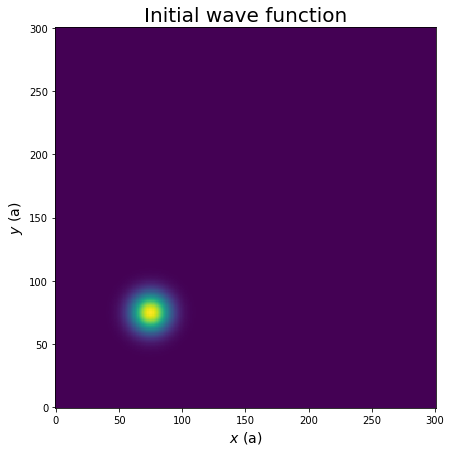

In [4]:
parameters = dict(
    Nx = 301,
    Ny = 301,
    dt = 1/np.sqrt(2),
    Nt = 300,
    potential = lambda x,y: np.rint(x//151), # Klein step
    mass = lambda x,y: 0*x,
    kx = 0,
    ky = 0,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    k = 0.5,
    phase = pi/4,
    sigma = 15,
    centre = (75,75),
    disorder = 0
)


wavefunction, lu = tf.tangent_fermions_evolution_real(parameters, plot_potential = True, plot_init_state = True)

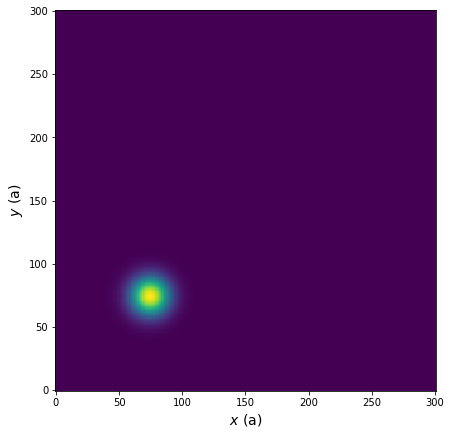

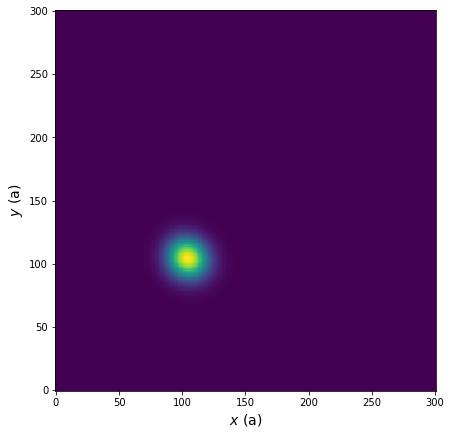

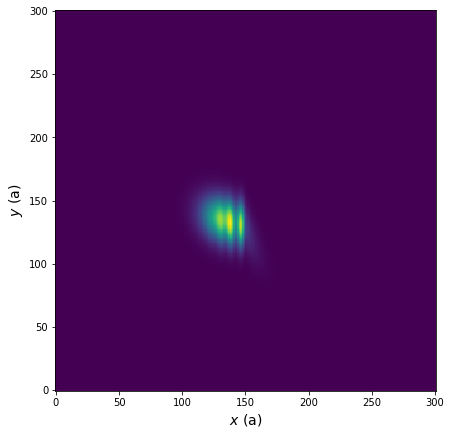

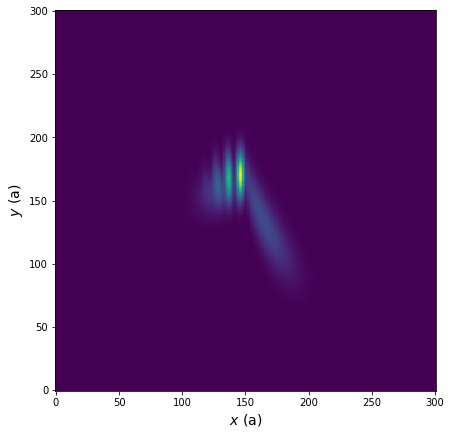

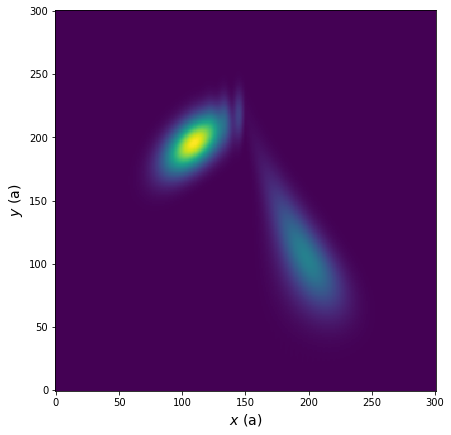

In [5]:
for t in range(5):
    probability = np.sum(np.abs(wavefunction[60*t])**2,axis = 0)
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    ax.imshow(probability, origin = 'lower')
    ax.set_xlabel(r'$x$ (a)', fontsize = 14)
    ax.set_ylabel(r'$y$ (a)', fontsize = 14)

The latter method can also be used to evolve states in presence of a magnetic field

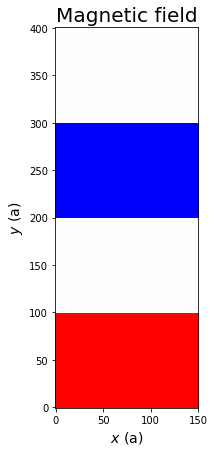

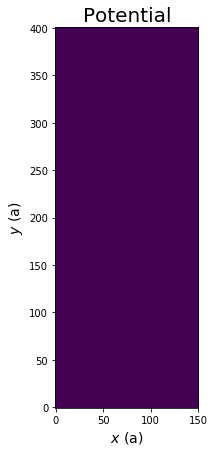

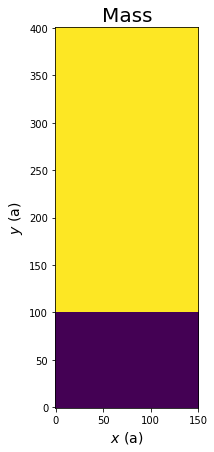

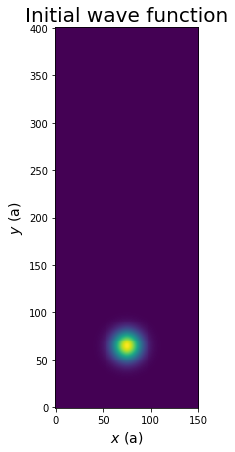

In [6]:
parameters = dict(
    Nx = 151,
    Ny = 401,
    N1 = 100,
    d1 = 100,
    N2 = 100,
    dt = 1/np.sqrt(2),
    Nt = 300,
    kx = 0,
    ky = 0,
    potential = lambda x,y: 0*x,
    mass = lambda x,y: 0.5*np.heaviside((y-101),1),
    B1 = 0.3 * 2*pi/100,
    k = 0.5,
    phase = pi/4,
    sigma = 15,
    centre = (75,65),
    disorder = 0.00
)

wavefunction, lu = tf.tangent_fermions_evolution_real(parameters, plot_mag_field = True, plot_potential = True, plot_mass = True, plot_init_state = True)

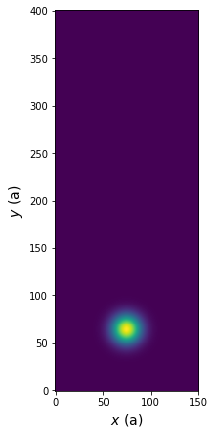

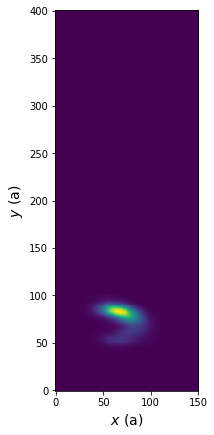

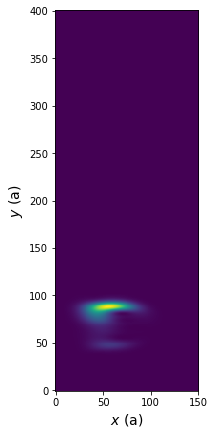

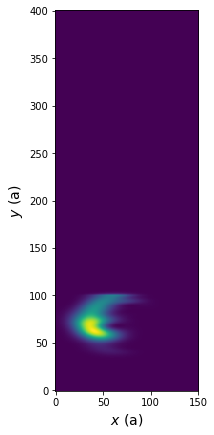

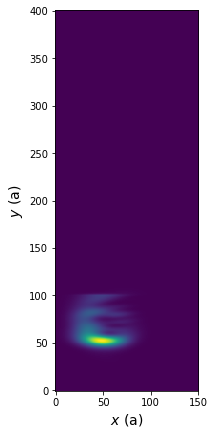

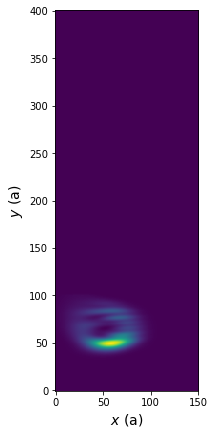

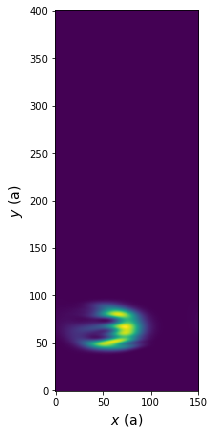

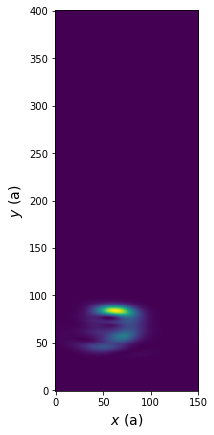

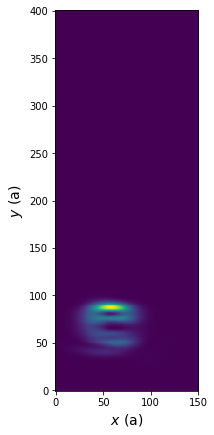

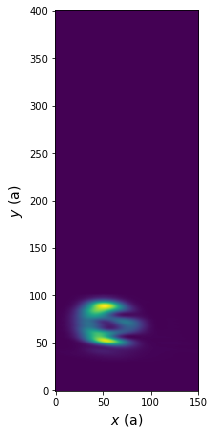

In [7]:
for t in range(10):
    probability = np.sum(np.abs(wavefunction[30*t])**2,axis = 0)
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    ax.imshow(probability, origin = 'lower')
    ax.set_xlabel(r'$x$ (a)', fontsize = 14)
    ax.set_ylabel(r'$y$ (a)', fontsize = 14)

Including some disorder

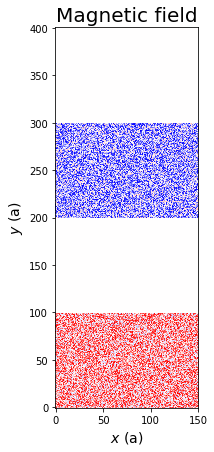

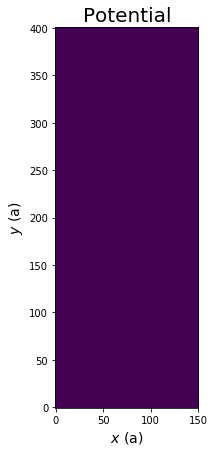

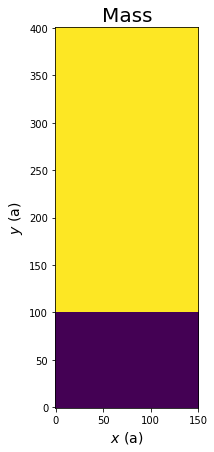

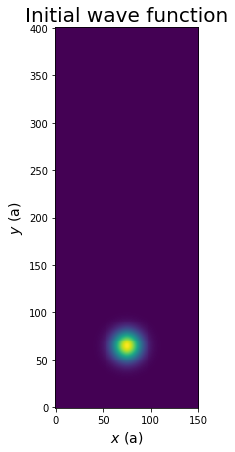

In [8]:
parameters = dict(
    Nx = 151,
    Ny = 401,
    N1 = 100,
    d1 = 100,
    N2 = 100,
    dt = 1/np.sqrt(2),
    Nt = 300,
    kx = 0,
    ky = 0,
    potential = lambda x,y: 0*x,
    mass = lambda x,y: 0.5*np.heaviside((y-101),1),
    B1 = 0.3 * 2*pi/100,
    k = 0.5,
    phase = pi/4,
    sigma = 15,
    centre = (75,65),
    disorder = 1 * 2*pi/100
)

wavefunction, lu = tf.tangent_fermions_evolution_real(parameters, plot_mag_field = True, plot_potential = True, plot_mass = True, plot_init_state = True)

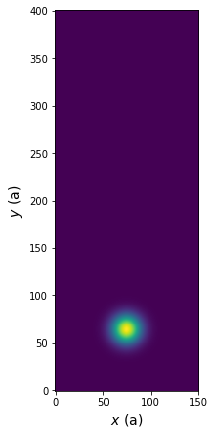

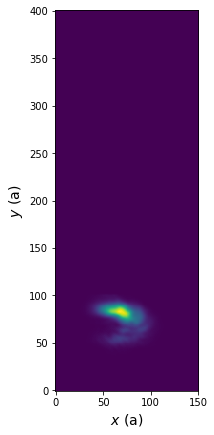

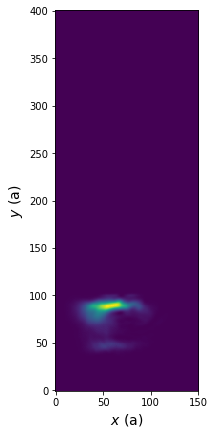

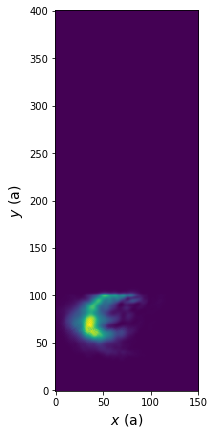

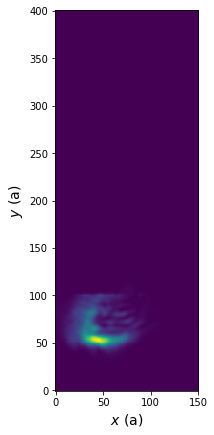

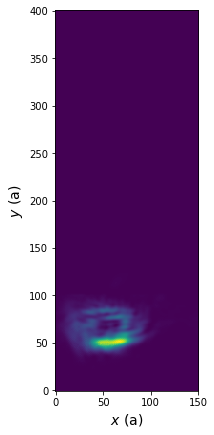

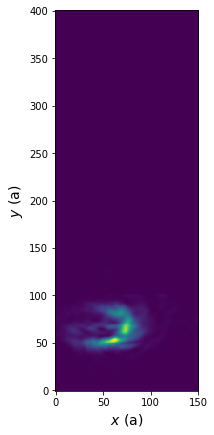

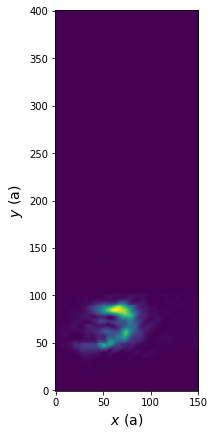

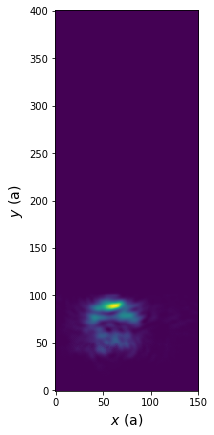

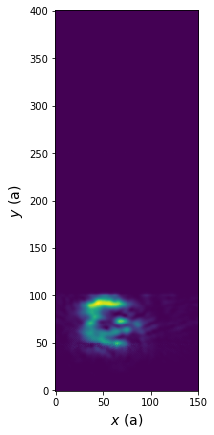

In [9]:
for t in range(10):
    probability = np.sum(np.abs(wavefunction[30*t])**2,axis = 0)
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    ax.imshow(probability, origin = 'lower')
    ax.set_xlabel(r'$x$ (a)', fontsize = 14)
    ax.set_ylabel(r'$y$ (a)', fontsize = 14)

We can use these functions to reproduce the Klein barrier of figure 6 in arXiv:2302.12793

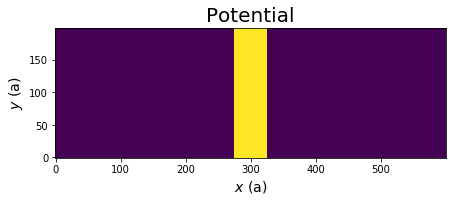

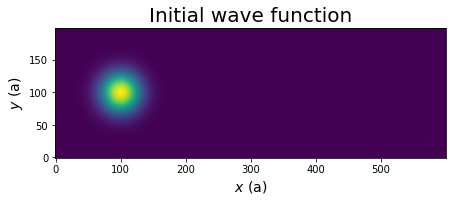

In [10]:
def potential(x,y):
    return 2*(np.heaviside((x-275),1)-np.heaviside((x-325),1))


parameters = dict(
    Nx = 600,
    Ny = 200,
    dt = 1/np.sqrt(2),
    Nt = 550,
    potential = potential,
    mass = lambda x,y: 0*x,
    k = 1,
    phase = 0,
    sigma = 30,
    centre = (100,100),
    disorder = 0
)

wavefunction = tf.tangent_fermions_evolution_reciprocal(parameters, plot_potential = True, plot_init_state = True)

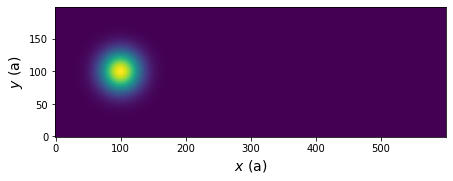

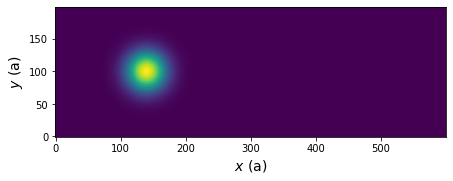

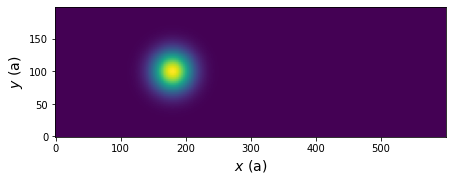

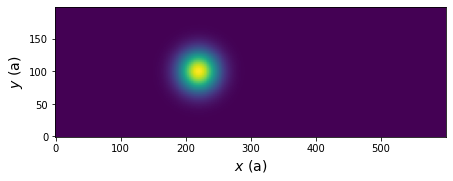

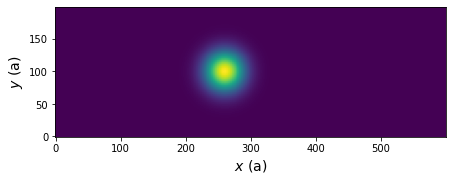

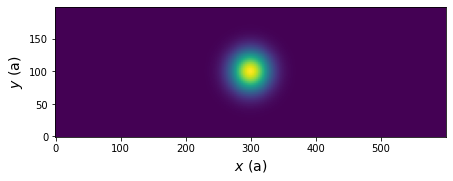

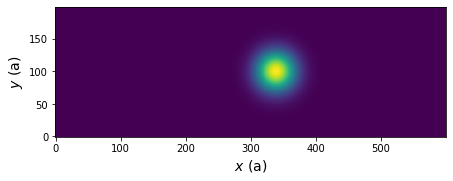

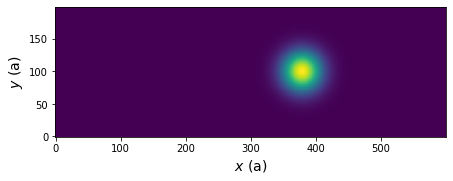

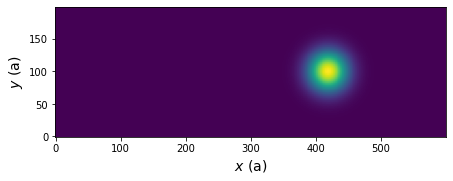

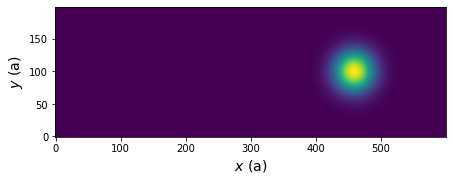

In [11]:
for t in range(10):
    probability = np.sum(np.abs(wavefunction[50*t])**2,axis = 0)
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    ax.imshow(probability, origin = 'lower')
    ax.set_xlabel(r'$x$ (a)', fontsize = 14)
    ax.set_ylabel(r'$y$ (a)', fontsize = 14)

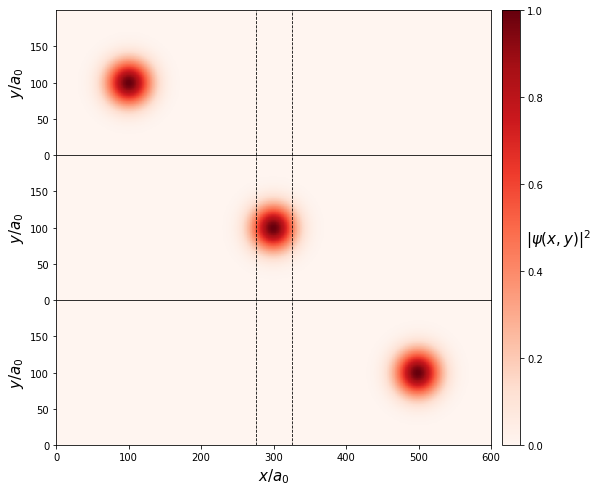

In [13]:
k = 0
fig = plt.figure(figsize = (10,8))
pos = []
ax = []

for t in [0,250,500]:

    probability = np.sum(np.abs(wavefunction[t])**2,axis = 0)
    probability = probability/np.amax(probability)

    ax.append(fig.add_subplot(3,1,k+1))
    pos.append(ax[k].imshow(probability,interpolation = "none", extent=[0,600,0,200],cmap = 'Reds',vmin = 0,vmax = 1))
    ax[k].set_ylabel(r"$y/a_0$",fontsize = 15)
    ax[k].set_yticks([0,50,100,150])
    ax[k].axvline(275,c='k', lw = 0.8, ls = '--')
    ax[k].axvline(325,c='k', lw = 0.8, ls = '--')
    if k != 2:
        plt.setp(ax[k].get_xticklabels(), visible=False)
        ax[k].set_xticks([])
    else:    
        ax[k].set_xlabel(r"$x/a_0$",fontsize = 15)

    if k == 2:
        reflected = np.sum(probability[:round(275)])
        transmitted = np.sum(probability[round(325):])
    k+=1

fig.subplots_adjust(right=0.88)
plt.subplots_adjust(hspace=.0)
c_loc = fig.add_axes([0.82, 0.125, 0.025, 0.755])
cbar = fig.colorbar(pos[2], cax=c_loc)
cbar.formatter.set_powerlimits((0, 0))
cbar.set_label('$|\psi(x,y)|^2$',fontsize = '15', rotation = 'horizontal',labelpad = 15 )